# 1. Carga de Datos y Preprocesamiento

Primero, se cargan los datos y eliminan las columnas RainToday y RainTomorrow ya que son columnas de predicción que pueden distorsionar los resultados:

In [1]:
import folium
import warnings
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim

In [2]:
warnings.filterwarnings('ignore')
file_path = 'weatherAUS.csv'
data = pd.read_csv(file_path)
data.drop(columns=['RainToday', 'RainTomorrow'], inplace=True, errors='ignore')

# 2. Análisis de Distribución de Variables Numéricas

Uso de histogramas para analizar la distribución de algunas variables numéricas:

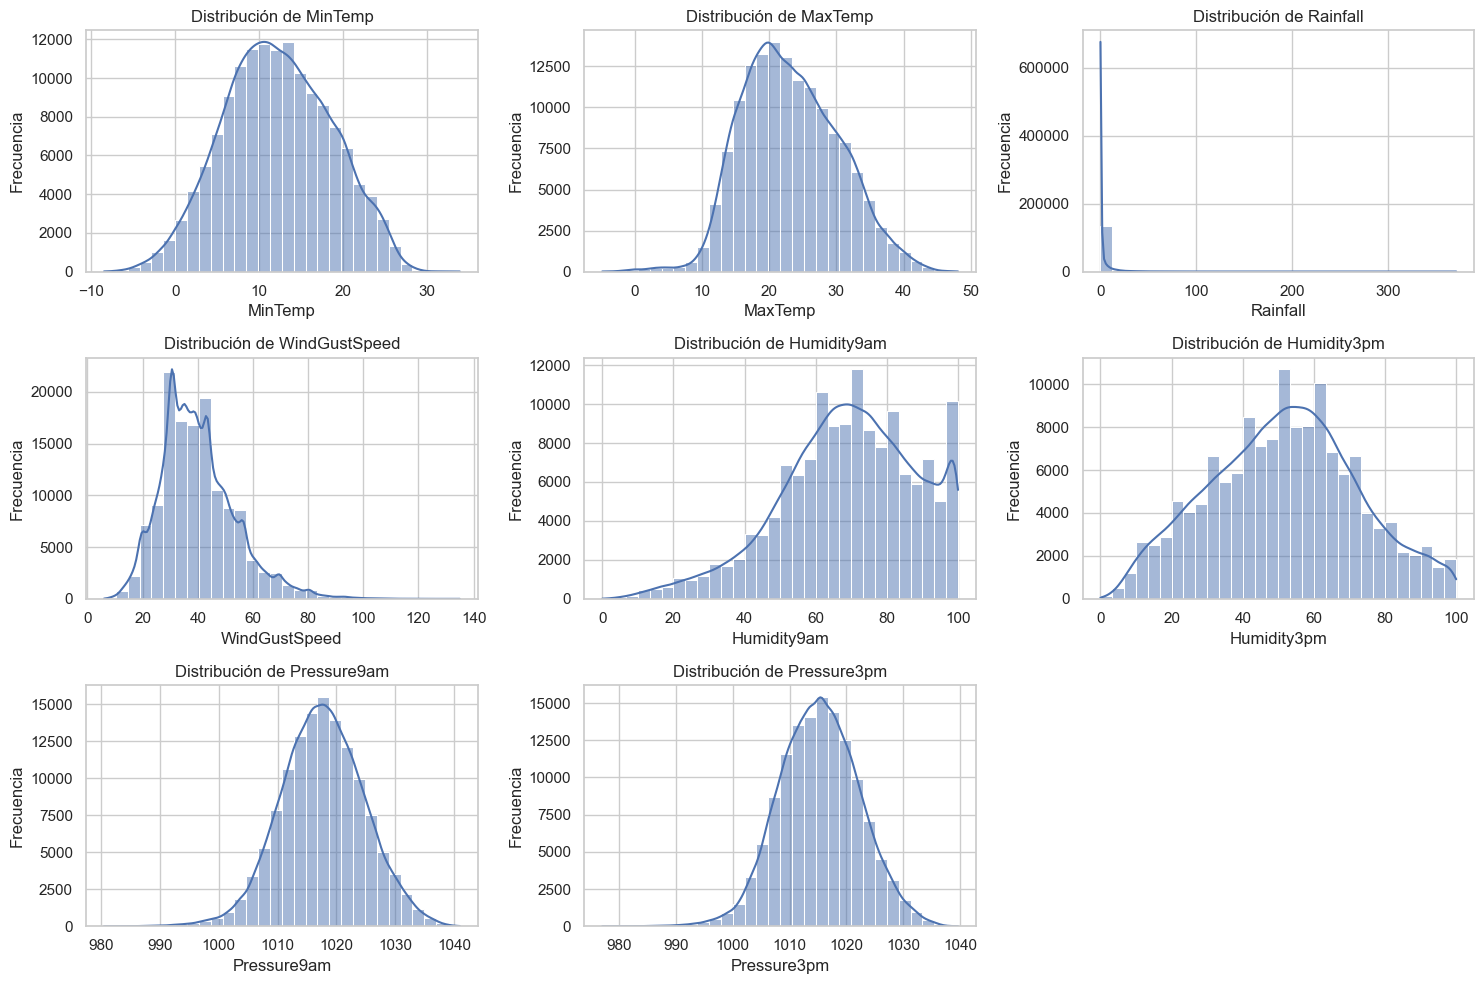

In [3]:
selected_numerical_variables = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']

sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

for i, variable in enumerate(selected_numerical_variables, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[variable], kde=True, bins=30)
    plt.title(f'Distribución de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Estos son los histogramas de algunas de las variables numéricas clave del conjunto de datos:

1. MinTemp y MaxTemp: Ambas muestran distribuciones que parecen normales, con la MinTemp centrada alrededor de 10°C y la MaxTemp alrededor de 20°C.

2. Rainfall: Esta variable tiene una distribución muy sesgada hacia la derecha. La mayoría de los días tienen poca o ninguna lluvia, pero hay algunos días con cantidades significativas de lluvia.

3. WindGustSpeed: La velocidad de las ráfagas de viento también parece tener una distribución ligeramente sesgada a la derecha, con la mayoría de los días experimentando velocidades moderadas de viento.

4. Humidity9am y Humidity3pm: La humedad a las 9am tiende a ser más alta en general que a las 3pm. Ambas muestran una amplia gama de valores.

5. Pressure9am y Pressure3pm: Las presiones a las 9am y a las 3pm muestran distribuciones bastante normales y similares entre sí.

# 3. Análisis de Valores Atípicos (Outliers)

Se han usado diagramas de caja para identificar valores atípicos en las mismas variables numéricas:

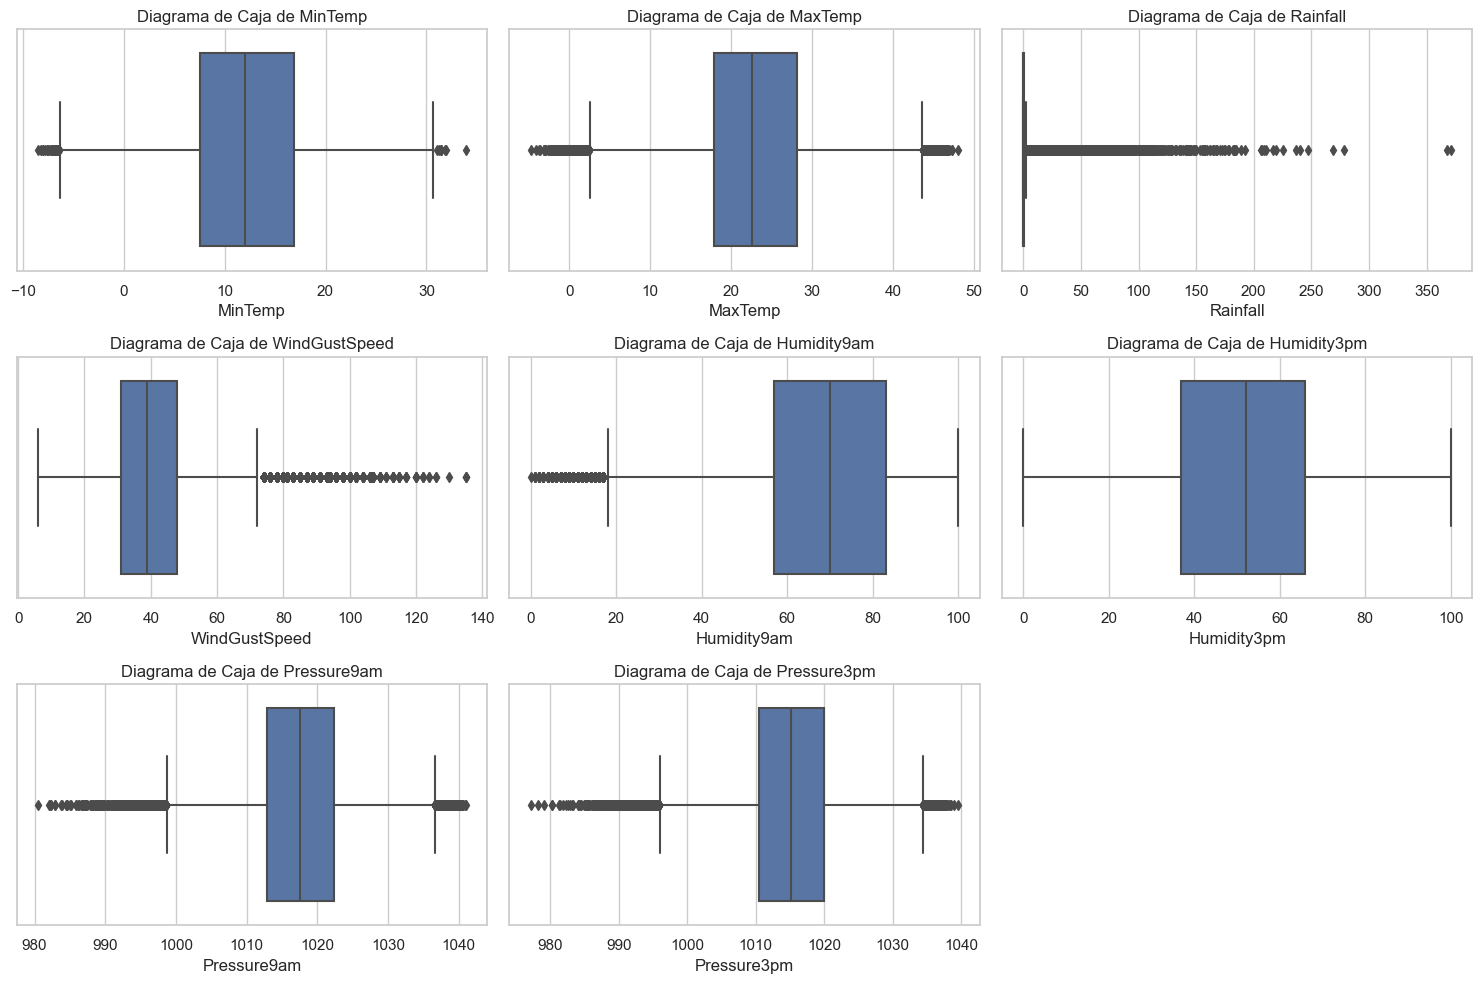

In [4]:
plt.figure(figsize=(15, 10))

for i, variable in enumerate(selected_numerical_variables, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[variable])
    plt.title(f'Diagrama de Caja de {variable}')

plt.tight_layout()
plt.show()

Los diagramas de caja proporcionan información valiosa sobre los valores atípicos en las variables seleccionadas:

1. MinTemp y MaxTemp: Muestran algunos valores atípicos, especialmente en temperaturas mínimas bajas y temperaturas máximas altas. Sin embargo, la mayoría de los datos se agrupan cerca de la mediana.

2. Rainfall: Esta variable tiene una gran cantidad de valores atípicos, lo que indica días con lluvias particularmente intensas. Esto es consistente con la naturaleza altamente variable de la precipitación.

3. WindGustSpeed: También presenta varios valores atípicos, reflejando días con vientos especialmente fuertes.

4. Humidity9am y Humidity3pm: Ambas presentan algunos valores atípicos. La humedad a las 9am muestra valores atípicos tanto en el extremo inferior como en el superior, mientras que la humedad a las 3pm tiene más valores atípicos en el extremo inferior.

5. Pressure9am y Pressure3pm: Estas variables tienen algunos valores atípicos, pero en general, los datos están bastante agrupados alrededor de la mediana, indicando variaciones menos extremas en la presión atmosférica.

Ahora, procederemos con un análisis de las variables categóricas, específicamente explorando la distribución de las categorías en variables como Location, WindGustDir, WindDir9am, y WindDir3pm.

# 4. Análisis de Variables Categóricas

Se han realizado gráficos de conteo para algunas variables categóricas seleccionadas:

Los gráficos muestran la distribución de las categorías en las variables seleccionadas:

1. Location: La frecuencia de registros varía significativamente entre las diferentes ubicaciones. Algunas ubicaciones tienen muchos más registros que otras.

2. WindGustDir, WindDir9am, y WindDir3pm: Estas variables, que representan la dirección del viento, muestran una distribución relativamente uniforme entre las diferentes direcciones. Sin embargo, hay ligeras variaciones en la frecuencia de ciertas direcciones.

Este análisis categórico proporciona una idea de cómo se distribuyen las observaciones a través de diferentes lugares y direcciones del viento. Podríamos profundizar más, por ejemplo, analizando cómo las condiciones climáticas varían por ubicación o cómo las direcciones del viento se correlacionan con otras variables climáticas

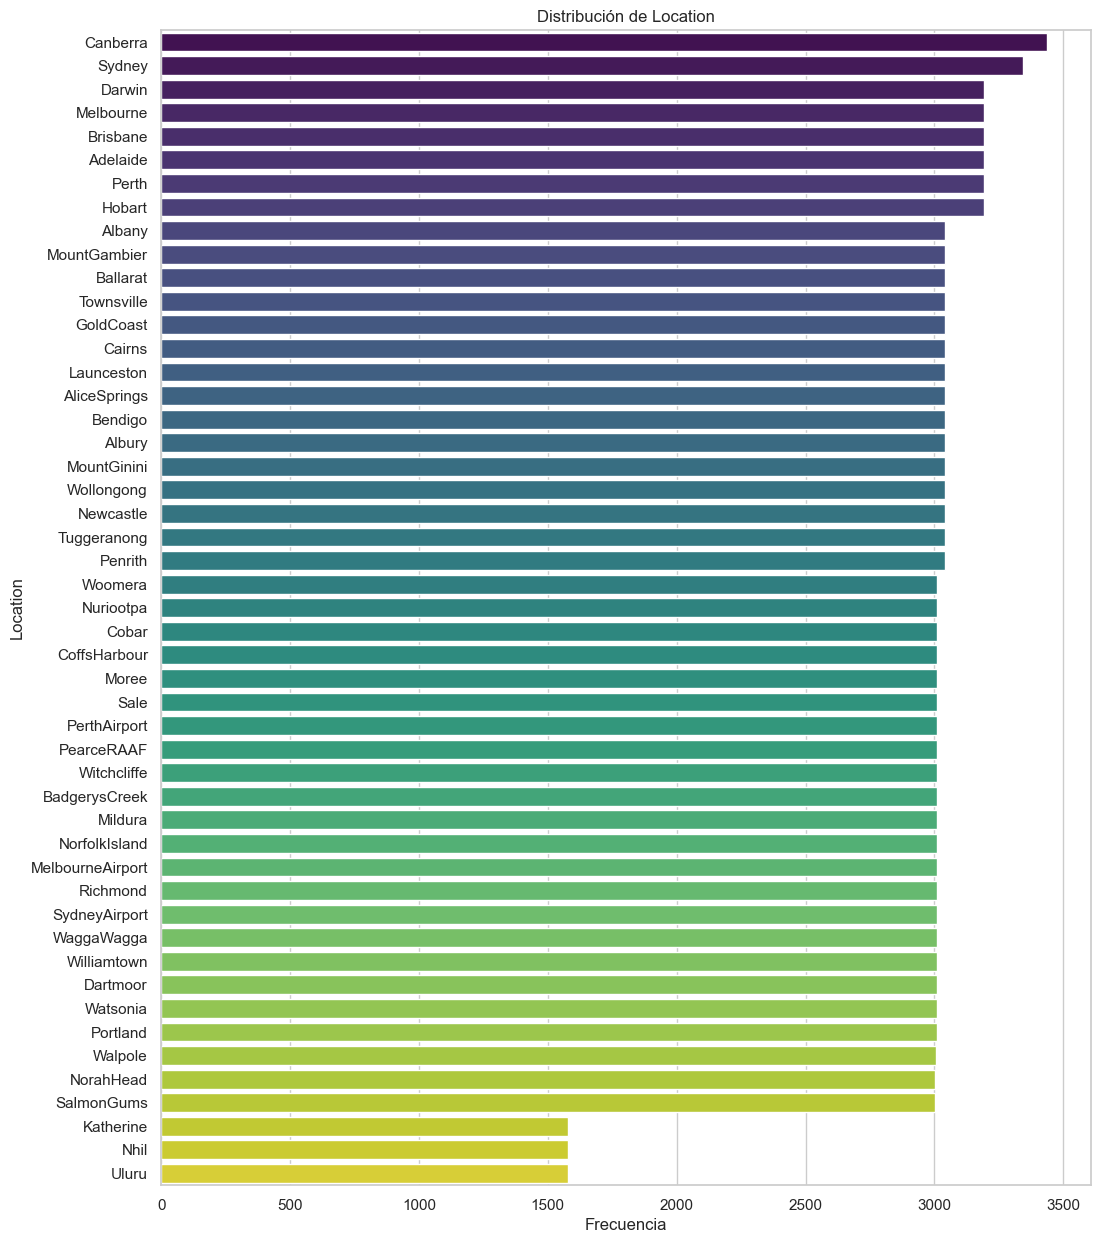

In [5]:
# Aumentar el tamaño de la figura y aplicar una paleta de colores 'viridis' a la gráfica de 'Location'
plt.figure(figsize=(12, 15))  # Tamaño más grande para evitar superposición

sns.countplot(y=data['Location'], order=data['Location'].value_counts().index, palette='viridis')
plt.title('Distribución de Location')
plt.xlabel('Frecuencia')
plt.ylabel('Location')

plt.show()

# Análisis de la Variable Location

La gráfica muestra la distribución de observaciones para diferentes ubicaciones. Podemos ver que algunas ubicaciones tienen una mayor cantidad de registros que otras. Este patrón podría deberse a diferencias en la duración del período de observación entre las ubicaciones o a la frecuencia con la que se recopilan los datos en cada ubicación.

# Análisis de la segunda variable categórica, WindGustDir

Representa la dirección de la ráfaga de viento más fuerte en el día.

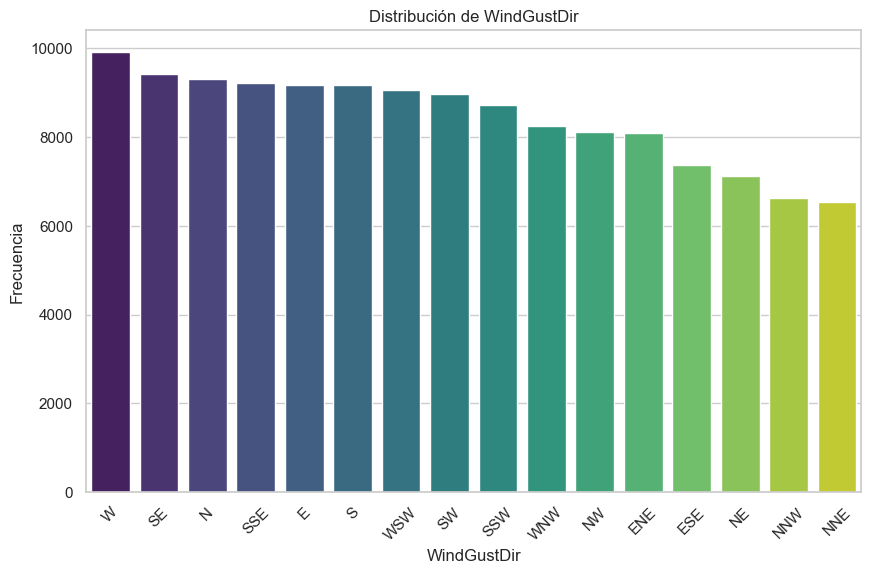

In [6]:
# Análisis de la variable 'WindGustDir' con paleta de colores 'viridis'
plt.figure(figsize=(10, 6))
sns.countplot(x=data['WindGustDir'], order=data['WindGustDir'].value_counts().index, palette='viridis')
plt.title('Distribución de WindGustDir')
plt.xlabel('WindGustDir')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

# Análisis de la tercera variable categórica, WindDir9am

Representa la dirección del viento a las 9 de la mañana.

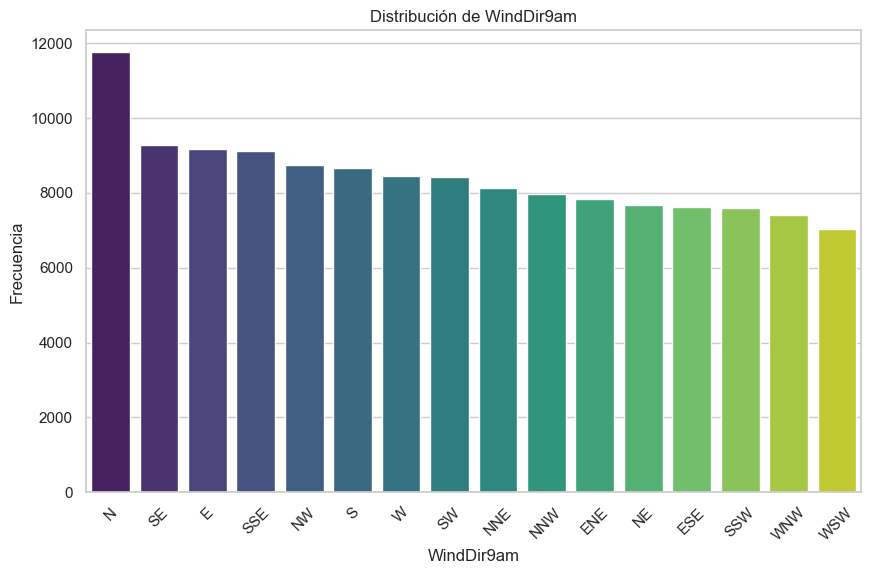

In [7]:
# Análisis de la variable 'WindDir9am' con paleta de colores 'viridis'
plt.figure(figsize=(10, 6))
sns.countplot(x=data['WindDir9am'], order=data['WindDir9am'].value_counts().index, palette='viridis')
plt.title('Distribución de WindDir9am')
plt.xlabel('WindDir9am')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

# Análisis de la Variable WindDir3pm

La gráfica de WindDir3pm, que muestra la distribución de la dirección del viento a las 3 de la tarde, refleja un patrón similar al observado en WindGustDir y WindDir9am. Las direcciones del viento están distribuidas de manera relativamente uniforme, con algunas variaciones notables en la frecuencia. Esto sugiere que, aunque hay cierta variabilidad en la dirección del viento a lo largo del día, hay tendencias consistentes en ciertas direcciones en las distintas ubicaciones.

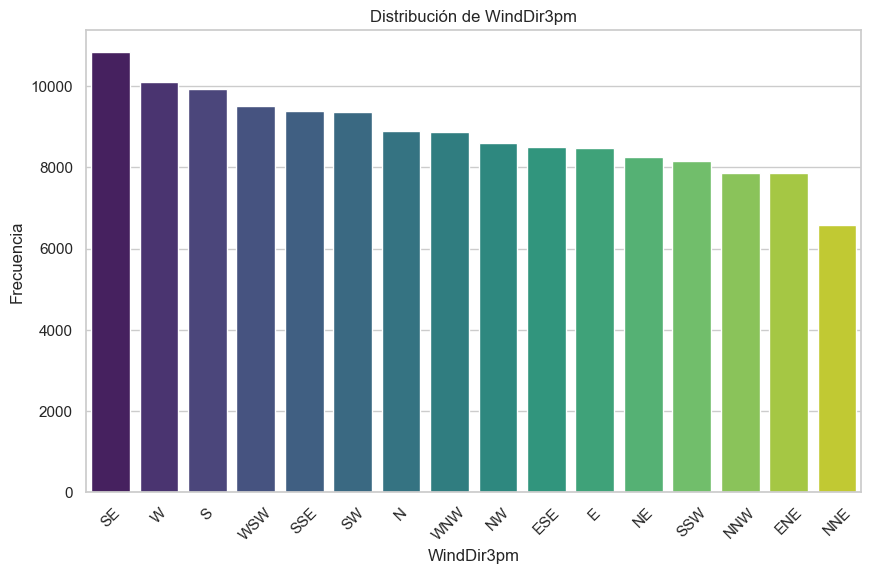

In [8]:
# Análisis de la variable 'WindDir3pm' con paleta de colores 'viridis'
plt.figure(figsize=(10, 6))
sns.countplot(x=data['WindDir3pm'], order=data['WindDir3pm'].value_counts().index, palette='viridis')
plt.title('Distribución de WindDir3pm')
plt.xlabel('WindDir3pm')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

## Lluvia media por ciudades en Australia

In [16]:
# Carga el conjunto de datos
result_df = pd.read_csv('weatherAUS.csv')
weather_data = pd.read_csv(file_path)
# Calcular la lluvia media por ciudad
rainfall_mean_by_location = result_df.groupby('Location')['Rainfall'].mean().reset_index()

# Diccionario de correcciones: {'NombreIncorrecto': 'NombreCorrecto'}
corrections = {
    'AliceSprings': 'Alice Springs',
    'BadgerysCreek': 'Badgerys Creek',
    'CoffsHarbour': 'Coffs Harbour',
    'MelbourneAirport': 'Melbourne Airport',
    'MountGambier': 'Mount Gambier',
    'MountGinini': 'Mount Ginini',
    'NorahHead': 'Norah Head',
    'NorfolkIsland': 'Norfolk Island',
    'PearceRAAF': 'Pearce RAAF',
    'PerthAirport': 'Perth Airport',
    'SalmonGums': 'Salmon Gums',
    'SydneyAirport': 'Sydney Airport',
    'WaggaWagga': 'Wagga Wagga'
}

# Aplicar las correcciones
for incorrect_name, correct_name in corrections.items():
    rainfall_mean_by_location.loc[rainfall_mean_by_location['Location'] == incorrect_name, 'Location'] = correct_name

# Inicializar el geolocalizador
geolocator = Nominatim(user_agent="geoapiExercises")

# Función para obtener coordenadas
def get_coordinates(city):
    try:
        location = geolocator.geocode(f"{city}, Australia")
        return location.latitude, location.longitude
    except:
        return None, None

# Lista para almacenar coordenadas
coords = []

# Iterar sobre cada ciudad y obtener sus coordenadas
for city in tqdm(rainfall_mean_by_location['Location']):
    lat, lon = get_coordinates(city)
    coords.append((lat, lon))

# Crear DataFrame con coordenadas
coords_df = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

# Concatenar resultados
result_df = pd.concat([rainfall_mean_by_location, coords_df], axis=1)

# Crear un mapa centrado en Australia
map_australia = folium.Map(location=[-25.2744, 133.7751], zoom_start=5)

# Filtrar las filas donde la latitud o la longitud son NaN
filtered_df = result_df.dropna(subset=['Latitude', 'Longitude'])

# Preparar los datos para el mapa de calor
heat_data = [[row['Latitude'], row['Longitude'], row['Rainfall']] for index, row in filtered_df.iterrows()]

# Crear y añadir el mapa de calor al mapa
HeatMap(heat_data).add_to(map_australia)

# Añadir marcadores para cada ciudad
for index, row in filtered_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Location'],  # El nombre de la ciudad como etiqueta emergente
        icon=folium.Icon(icon='cloud')
    ).add_to(map_australia)

# Mostrar el mapa
map_australia

100%|██████████| 49/49 [00:26<00:00,  1.88it/s]


## Relación entre las temperaturas máximas / mínimas, precipitación por ciudad

La diferencia entre la temperatura máxima y mínima en una ciudad está relacionada con la lluvia.

Esto se debe a que los sistemas meteorológicos que producen lluvia suelen traer cambios bruscos en el clima. Cuando un sistema meteorológico se acerca a una ciudad, las temperaturas suelen caer. Esto se debe a que el sistema meteorológico bloquea la luz solar, lo que hace que el aire se enfríe.

Una vez que el sistema meteorológico pasa, las temperaturas suelen subir rápidamente. Esto se debe a que el sol vuelve a brillar y el aire se calienta.

Por lo tanto, si una ciudad experimenta una gran diferencia entre la temperatura máxima y mínima, es probable que haya un sistema meteorológico que produzca lluvia en la zona.

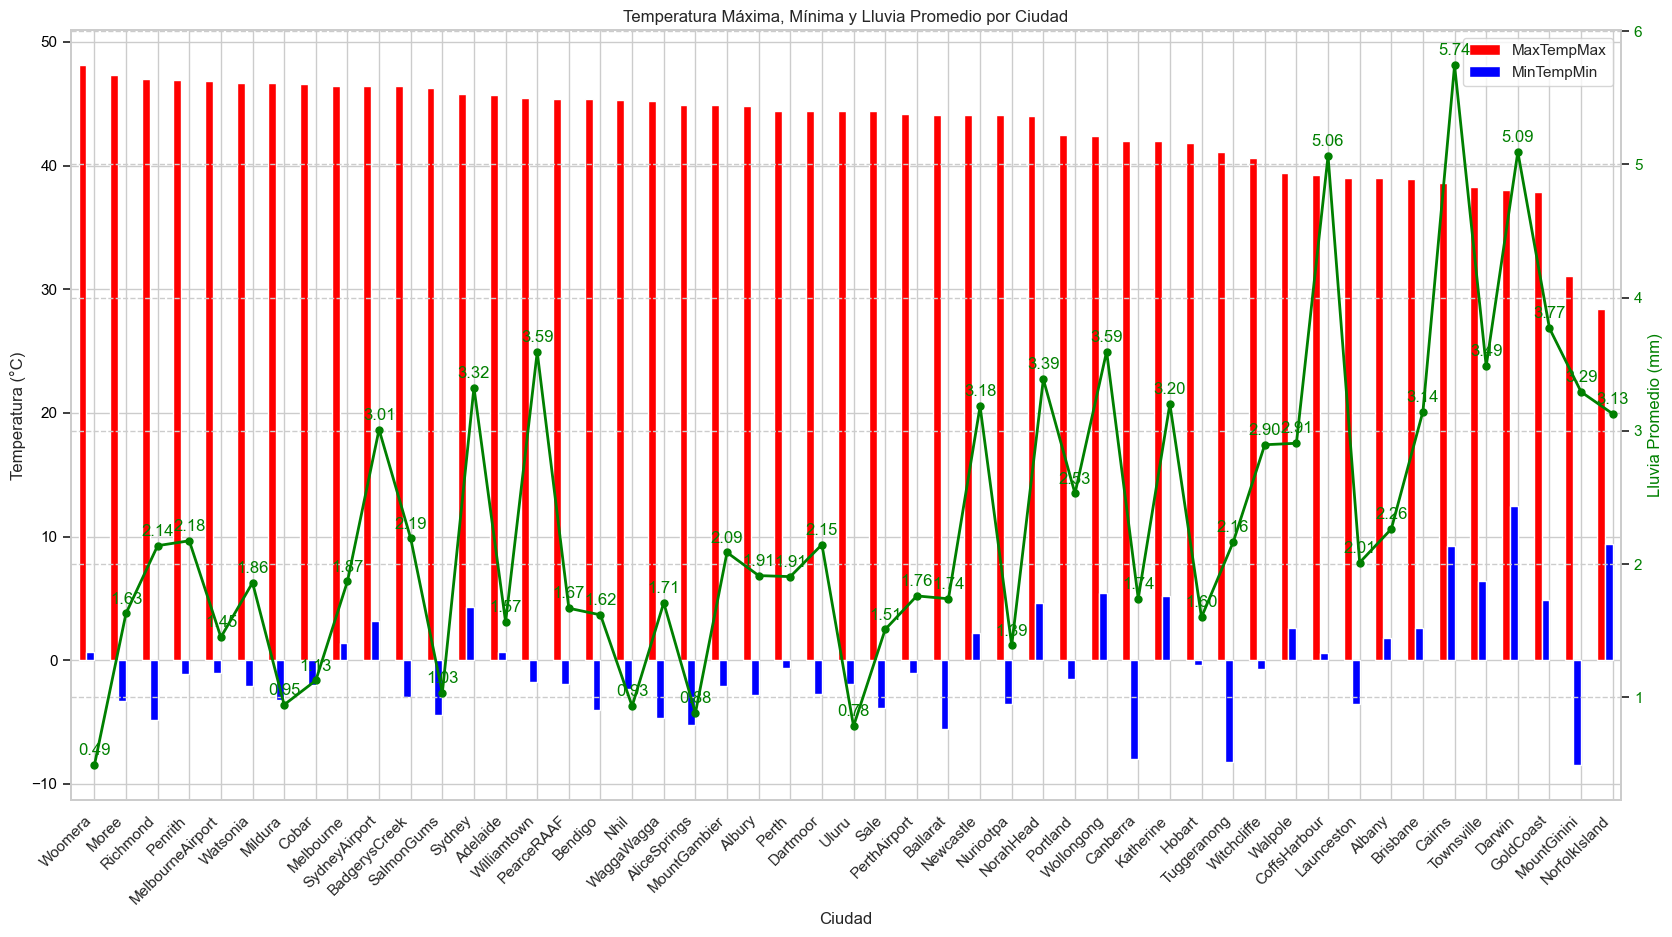

In [17]:
# Cargando el archivo CSV nuevamente
file_path = 'weatherAUS.csv'
weather_data = pd.read_csv(file_path)

# Calculando la temperatura máxima y mínima para cada ciudad
temp_max_min = weather_data.groupby('Location').agg(MaxTempMax=('MaxTemp', 'max'), MinTempMin=('MinTemp', 'min'))

# Calculando la cantidad promedio de lluvia para cada ciudad
rainfall_avg = weather_data.groupby('Location')['Rainfall'].mean()

# Uniendo los datos de temperatura y lluvia
combined_data = temp_max_min.join(rainfall_avg)

# Creando el gráfico combinado con anotaciones numéricas para la lluvia
fig, ax1 = plt.subplots(figsize=(20, 10))

# Barras para las temperaturas
combined_data.sort_values(by='MaxTempMax', ascending=False)[['MaxTempMax', 'MinTempMin']].plot(kind='bar', color=['red', 'blue'], ax=ax1, position=1)
ax1.set_xlabel('Ciudad')
ax1.set_ylabel('Temperatura (°C)')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticklabels(combined_data.sort_values(by='MaxTempMax', ascending=False).index, rotation=45, ha='right')

# Linea para la lluvia
ax2 = ax1.twinx()
line = combined_data.sort_values(by='MaxTempMax', ascending=False)['Rainfall'].plot(kind='line', color='green', ax=ax2, linewidth=2, marker='o', markersize=5)
ax2.set_ylabel('Lluvia Promedio (mm)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Añadiendo anotaciones de texto para la lluvia
for i, value in enumerate(combined_data.sort_values(by='MaxTempMax', ascending=False)['Rainfall']):
    ax2.annotate(f'{value:.2f}', xy=(i, value), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', color='green')

plt.title('Temperatura Máxima, Mínima y Lluvia Promedio por Ciudad')
plt.grid(axis='y', linestyle='--')

# Mostrando el gráfico
plt.show()

## Relación entre Humedad Promedio y Lluvia Promedio por Ciudad

La humedad y la lluvia están estrechamente relacionadas. La humedad es la cantidad de vapor de agua que hay en el aire. La lluvia es la precipitación de agua en forma líquida.

La humedad es un factor importante en la formación de la lluvia. El vapor de agua en el aire puede condensarse y formar gotas de agua cuando la temperatura del aire desciende. Estas gotas de agua pueden crecer y caer en forma de lluvia.

Por lo tanto, cuanto mayor sea la humedad del aire, más probable es que se produzca lluvia.

Además, la humedad también puede afectar a la intensidad de la lluvia. Cuando el aire está muy húmedo, las gotas de agua pueden crecer más grandes y caer con más fuerza. Esto puede dar lugar a lluvias más intensas.

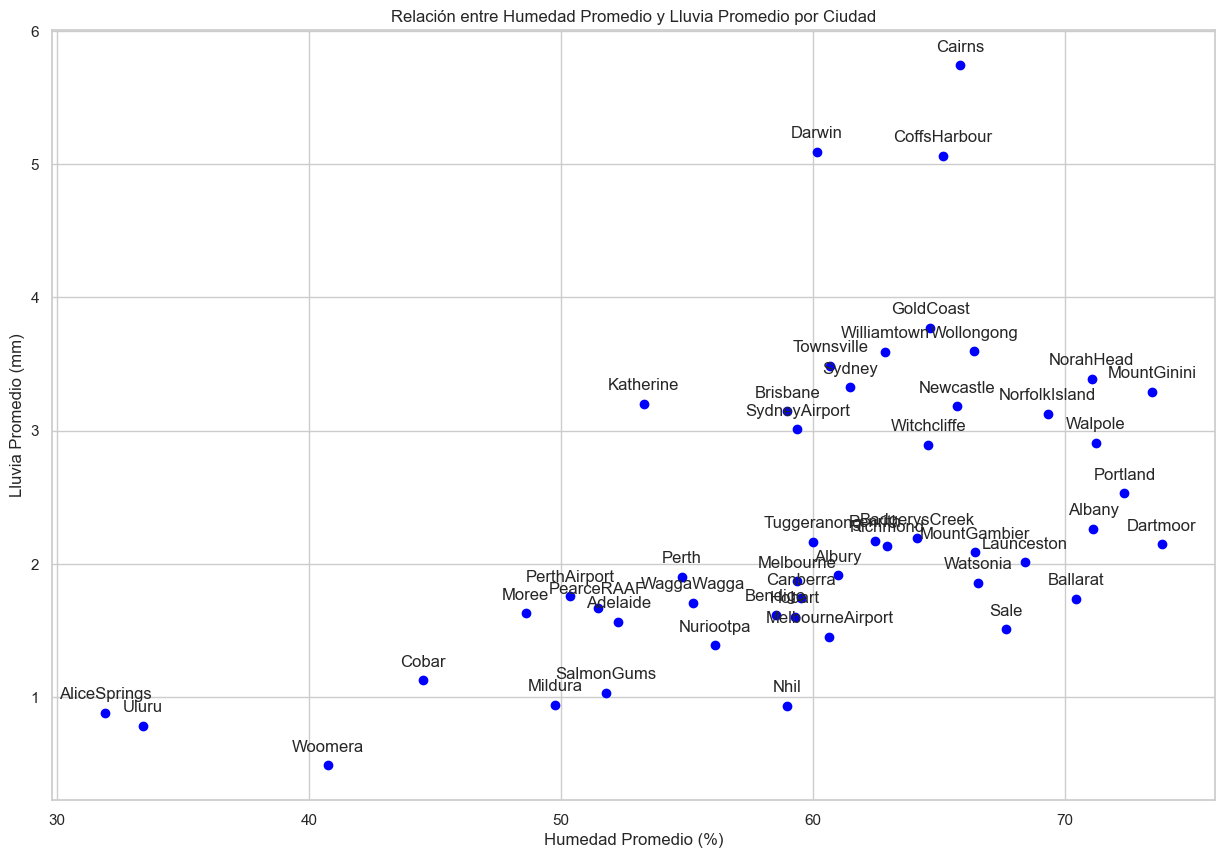

In [18]:
# Calculando la humedad promedio a las 9 am y a las 3 pm para cada ciudad
humidity9am_avg = weather_data.groupby('Location')['Humidity9am'].mean()
humidity3pm_avg = weather_data.groupby('Location')['Humidity3pm'].mean()

# Calculando la humedad promedio general (promedio entre la mañana y la tarde)
humidity_avg = (humidity9am_avg + humidity3pm_avg) / 2

# Añadiendo la humedad promedio al dataframe combinado
combined_data['HumidityAvg'] = humidity_avg

# Creando el gráfico de dispersión
plt.figure(figsize=(15, 10))
plt.scatter(combined_data['HumidityAvg'], combined_data['Rainfall'], color='blue')
plt.title('Relación entre Humedad Promedio y Lluvia Promedio por Ciudad')
plt.xlabel('Humedad Promedio (%)')
plt.ylabel('Lluvia Promedio (mm)')
plt.grid(True)

# Añadiendo etiquetas para cada punto
for i, txt in enumerate(combined_data.index):
    plt.annotate(txt, (combined_data['HumidityAvg'][i], combined_data['Rainfall'][i]), textcoords="offset points", xytext=(0,10), ha='center')

# Mostrando el gráfico
plt.show()

## Relación entre Presión Atmosférica Promedio y Lluvia Promedio por Ciudad

La presión atmosférica y la lluvia están estrechamente relacionadas. La presión atmosférica es la fuerza que ejerce el aire sobre la superficie de la Tierra. La lluvia es la precipitación de agua en forma líquida.

En general, cuanto menor sea la presión atmosférica, más probable es que se produzca lluvia. Esto se debe a que el aire a baja presión es más inestable y más susceptible de generar nubes.

Además, la presión atmosférica también puede afectar a la intensidad de la lluvia. Cuando la presión atmosférica es baja, las nubes pueden crecer más grandes y producir más lluvia.

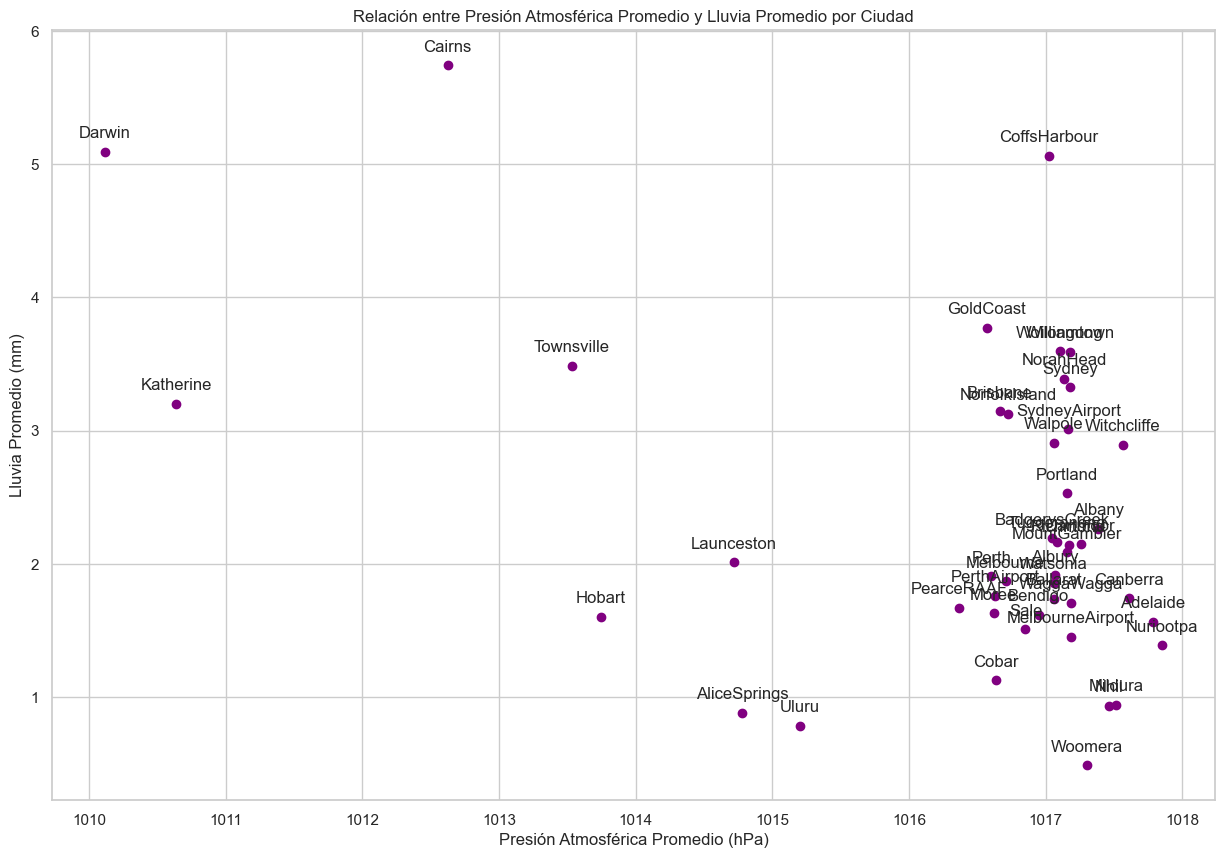

In [19]:
# Calculando la presión atmosférica promedio a las 9 am y a las 3 pm para cada ciudad
pressure9am_avg = weather_data.groupby('Location')['Pressure9am'].mean()
pressure3pm_avg = weather_data.groupby('Location')['Pressure3pm'].mean()

# Calculando la presión atmosférica promedio general (promedio entre la mañana y la tarde)
pressure_avg = (pressure9am_avg + pressure3pm_avg) / 2

# Añadiendo la presión promedio al dataframe combinado
combined_data['PressureAvg'] = pressure_avg

# Creando el gráfico de dispersión para la presión y la lluvia
plt.figure(figsize=(15, 10))
plt.scatter(combined_data['PressureAvg'], combined_data['Rainfall'], color='purple')
plt.title('Relación entre Presión Atmosférica Promedio y Lluvia Promedio por Ciudad')
plt.xlabel('Presión Atmosférica Promedio (hPa)')
plt.ylabel('Lluvia Promedio (mm)')
plt.grid(True)

# Añadiendo etiquetas para cada punto
for i, txt in enumerate(combined_data.index):
    plt.annotate(txt, (combined_data['PressureAvg'][i], combined_data['Rainfall'][i]), textcoords="offset points", xytext=(0,10), ha='center')

# Mostrando el gráfico
plt.show()

## Relación Ciudad-Fechas
Aquí vemos que nos todas las ciudades tienen la misma cantidad de fechas

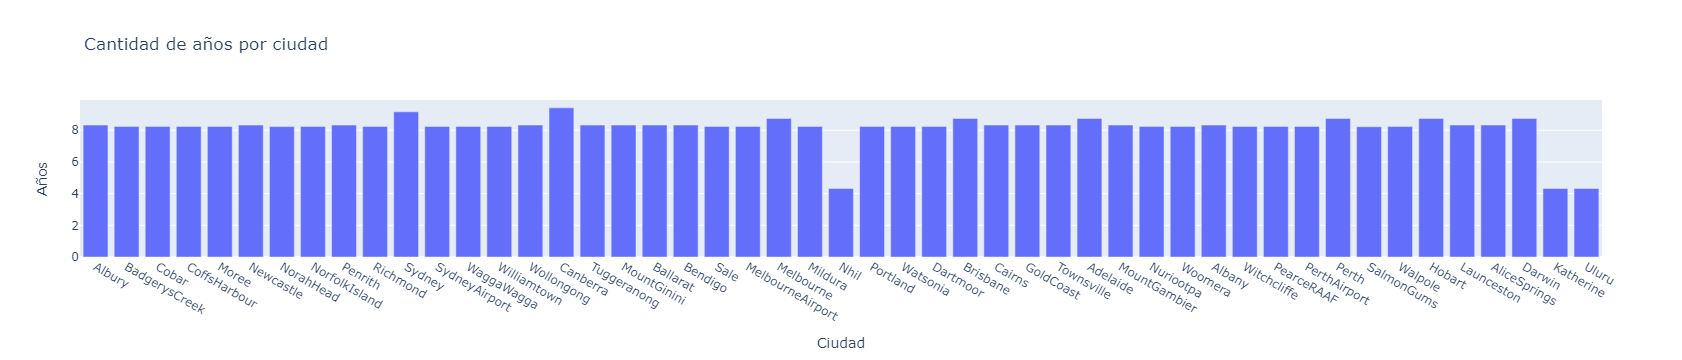

In [28]:
filas_ciudad = [len(weather_data[weather_data["Location"] == ciudad])/365 for ciudad in weather_data.Location.unique()]       
px.bar(x = weather_data.Location.unique(),
           y= filas_ciudad,
  title="Cantidad de años por ciudad",
  labels={'x': 'Ciudad', 'y': 'Años'})